In [794]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as optimize
import scipy.integrate as integrate
from iminuit import Minuit

In [795]:
#Daten einlesen
with open('3_3DHHPWinkel0Frequenz8823M1.txt') as data:
    zeitw0m1 = np.loadtxt(data, usecols= 0)
with open('3_3DHHPWinkel0Frequenz8823M1.txt') as data:
    empfaengerw0m1 = np.loadtxt(data, usecols= 1)
with open('3_3DHHPWinkel0Frequenz8823M1.txt') as data:
    eingansw0m1 = np.loadtxt(data, usecols= 2)

with open('3_3DHHPWinkel0Frequenz8823M2.txt') as data:
    zeitw0m2 = np.loadtxt(data, usecols= 0)
with open('3_3DHHPWinkel0Frequenz8823M2.txt') as data:
    empfaengerw0m2 = np.loadtxt(data, usecols= 1)
with open('3_3DHHPWinkel0Frequenz8823M2.txt') as data:
    eingansw0m2 = np.loadtxt(data, usecols= 2)

with open('3_3DHHPWinkel0Frequenz8823M3.txt') as data:
    zeitw0m3 = np.loadtxt(data, usecols= 0)
with open('3_3DHHPWinkel0Frequenz8823M3.txt') as data:
    empfaengerw0m3 = np.loadtxt(data, usecols= 1)
with open('3_3DHHPWinkel0Frequenz8823M3.txt') as data:
    eingansw0m3 = np.loadtxt(data, usecols= 2)

with open('3_3DHHPWinkel0Frequenz8823M4.txt') as data:
    zeitw0m4 = np.loadtxt(data, usecols= 0)
with open('3_3DHHPWinkel0Frequenz8823M4.txt') as data:
    empfaengerw0m4 = np.loadtxt(data, usecols= 1)
with open('3_3DHHPWinkel0Frequenz8823M4.txt') as data:
    eingansw0m4 = np.loadtxt(data, usecols= 2)

with open('3_3DHHPWinkel30Frequenz8824M1.txt') as data:
    zeitw30m1 = np.loadtxt(data, usecols= 0)
with open('3_3DHHPWinkel30Frequenz8824M1.txt') as data:
    empfaengerw30m1 = np.loadtxt(data, usecols= 1)
with open('3_3DHHPWinkel30Frequenz8824M1.txt') as data:
    eingansw30m1 = np.loadtxt(data, usecols= 2)

with open('3_3DHHPWinkel60Frequenz8822M1.txt') as data:
    zeitw60m1 = np.loadtxt(data, usecols= 0)
with open('3_3DHHPWinkel60Frequenz8822M1.txt') as data:
    empfaengerw60m1 = np.loadtxt(data, usecols= 1)
with open('3_3DHHPWinkel60Frequenz8822M1.txt') as data:
    eingansw60m1 = np.loadtxt(data, usecols= 2)

with open('3_3DHHPWinkel90Frequenz8824M1.txt') as data:
    zeitw90m1 = np.loadtxt(data, usecols= 0)
with open('3_3DHHPWinkel90Frequenz8824M1.txt') as data:
    empfaengerw90m1 = np.loadtxt(data, usecols= 1)
with open('3_3DHHPWinkel90Frequenz8824M1.txt') as data:
    eingansw90m1 = np.loadtxt(data, usecols= 2)

with open('3_3DHHPWinkel120Frequenz8822M1.txt') as data:
    zeitw120m1 = np.loadtxt(data, usecols= 0)
with open('3_3DHHPWinkel120Frequenz8822M1.txt') as data:
    empfaengerw120m1 = np.loadtxt(data, usecols= 1)
with open('3_3DHHPWinkel120Frequenz8822M1.txt') as data:
    eingansw120m1 = np.loadtxt(data, usecols= 2)

with open('3_3DHHPWinkel150Frequenz8823M1.txt') as data:
    zeitw150m1 = np.loadtxt(data, usecols= 0)
with open('3_3DHHPWinkel150Frequenz8823M1.txt') as data:
    empfaengerw150m1 = np.loadtxt(data, usecols= 1)
with open('3_3DHHPWinkel150Frequenz8823M1.txt') as data:
    eingansw150m1 = np.loadtxt(data, usecols= 2)

with open('3_3DHHPWinkel180Frequenz8822M1.txt') as data:
    zeitw180m1 = np.loadtxt(data, usecols= 0)
with open('3_3DHHPWinkel180Frequenz8822M1.txt') as data:
    empfaengerw180m1 = np.loadtxt(data, usecols= 1)
with open('3_3DHHPWinkel180Frequenz8822M1.txt') as data:
    eingansw180m1 = np.loadtxt(data, usecols= 2)

with open('Frequenzen.txt') as data:
    frequenzen = 10**6*np.loadtxt(data, usecols= 0)

In [796]:
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Linearfit 
def line(x, a, b):
    return a + x * b

def calculate_g(nu, B):
    h = 6.62607015*10**(-34)
    mub = 9.2741*10**(-24)
    g=h*nu/(mub*B)
    return g

def calculate_delta_g(nu, deltanu, B, deltaB):
    h = 6.62607015*10**(-34)
    mub = 9.2741*10**(-24)
    delta_g = np.sqrt((h/(mub*B)*deltanu)**2+((h*nu/(2*mub*B**2)*deltaB))**2)
    return delta_g
    
magnetfeld_aufsteigend = []
magnetfeld_aufsteigend_fehler = []
magnetfeld_absteigend = []
magnetfeld_absteigend_fehler = []

In [797]:
#Nulldurchgang automatisch finden Aufsteigend 
def plotNulldurchgangAufsteigend(lst, empf):
    maximumarr = np.where(lst == max(lst))
    maximumidx = maximumarr[0][0]
    output_aufsteigend = lst[0:maximumidx] * 22.92 + 289.1
    output_aufsteigend_fehler = lst[maximumidx:] * 0.16 + 0.4

    empf_aufsteigend = empf[0:maximumidx]

    #Magnetfeld fit aufsteigend
    fig, ax = plt.subplots(figsize=(12,6))
    #Name for axis
    ax.set_xlabel('Magnetfeld [mT]', fontsize=20)
    ax.set_ylabel('Empfängerspannung [V]', fontsize=20)
    
    #Algorithmus zum finden des Nulldurchgans
    max_empf = np.where(empf_aufsteigend == max(empf_aufsteigend))[0][0]
    
    min_empf = np.where(empf_aufsteigend == min(empf_aufsteigend))[0][0]
    ax.errorbar(output_aufsteigend[max_empf-1000:min_empf+1000], empf_aufsteigend[max_empf-1000:min_empf+1000], xerr=output_aufsteigend_fehler[max_empf-1000:min_empf+1000], yerr=0.02,markersize=2, fmt='.', color = "darkgreen",label = "Empfängersignal")

    suchliste = empf_aufsteigend
    suchliste[0:min_empf] = 20
    suchliste[max_empf:np.size(empf_aufsteigend)] = 20
    params, cov = optimize.curve_fit(line,output_aufsteigend[min_empf:max_empf], empf_aufsteigend[min_empf:max_empf])
    x_fit = np.linspace(output_aufsteigend[max_empf], output_aufsteigend[min_empf])
    y_fit = line(x_fit, params[0], params[1])
    
    ax.plot(x_fit, y_fit, color = "grey", label="Geradenfit an Nulldurchgang")

    index=abs(y_fit).argmin()
    magnetfeld_nulldurchgang = x_fit[index]
    #y_error = line(magnetfeld_nulldurchgang, np.sqrt(cov[0]), np.sqrt(cov[1]))
    
    print("Nulldurchgang des Magnetfelds aufsteigend: ",magnetfeld_nulldurchgang)
    inspannung = (magnetfeld_nulldurchgang-288.8)/23.75
    magnetfeld_fehler = 0.27*inspannung+0.6
    print("Fehler Magnetfeld: ", magnetfeld_fehler)
    ax.vlines(magnetfeld_nulldurchgang,-0.5, 0.5, label="Nulldurchgang")
    #ax.plot(output_absteigend, suchliste,'.',markersize=2, color = "lightblue",label = "Empfängersignal mit aufsteigendem Magnetfeld")

    magnetfeld_aufsteigend.append(magnetfeld_nulldurchgang)
    magnetfeld_aufsteigend_fehler.append(magnetfeld_fehler)


    ax.legend(fontsize=15, loc="upper left")
    plt.show()


In [798]:
#Calibration 
def plotNulldurchgangAbsteigend(lst, empf):
    maximumarr = np.where(lst == max(lst))
    maximumidx = maximumarr[0][0]
    output_absteigend = lst[maximumidx:] * 21.9 + 293.9
    output_absteigend_fehler = lst[maximumidx:] * 0.3 + 0.7
    empf_absteigend = empf[maximumidx:]

    #Magnetfeld fit aufsteigend
    fig, ax = plt.subplots(figsize=(12,6))
    #Name for axis
    ax.set_xlabel('Magnetfeld [mT]', fontsize=20)
    ax.set_ylabel('Empfängerspannung [V]', fontsize=20)
    
    
    #Plotten der unskalierten Kurven
    #ax.plot(output_absteigend, empf_absteigend,'.',markersize=2, color = "lightblue",label = "Empfängersignal mit aufsteigendem Magnetfeld")

    
    #Algorithmus zum finden des Nulldurchgans
    max_empf = np.where(empf_absteigend == max(empf_absteigend))[0][0]
    
    min_empf = np.where(empf_absteigend == min(empf_absteigend))[0][0]
    ax.errorbar(output_absteigend[max_empf-1000:min_empf+1000], empf_absteigend[max_empf-1000:min_empf+1000], xerr=output_absteigend_fehler[max_empf-1000:min_empf+1000], yerr=0.02,markersize=2, fmt='.', color = "darkgreen",label = "Empfängersignal")

    suchliste = empf_absteigend
    suchliste[0:max_empf] = 20
    suchliste[min_empf:np.size(empf_absteigend)] = 20
    params, cov = optimize.curve_fit(line,output_absteigend[max_empf:min_empf], empf_absteigend[max_empf:min_empf])
    x_fit = np.linspace(output_absteigend[max_empf], output_absteigend[min_empf])
    y_fit = line(x_fit, params[0], params[1])
    
    ax.plot(x_fit, y_fit, color = "grey", label="Geradenfit an Nulldurchgang")

    index=abs(y_fit).argmin()
    magnetfeld_nulldurchgang = x_fit[index]
    inspannung = (magnetfeld_nulldurchgang-296.1)/22.2
    magnetfeld_fehler = 0.3*inspannung+0.8
    print("Nulldurchgang des Magnetfelds absteigend: ",magnetfeld_nulldurchgang)
    print("Fehler Magnetfeld: ", magnetfeld_fehler)
    ax.vlines(magnetfeld_nulldurchgang,-0.5, 0.5, label="Nulldurchgang")
    #ax.plot(output_absteigend, suchliste,'.',markersize=2, color = "lightblue",label = "Empfängersignal mit aufsteigendem Magnetfeld")

    magnetfeld_absteigend.append(magnetfeld_nulldurchgang)
    magnetfeld_absteigend_fehler.append(magnetfeld_fehler)


    ax.legend(fontsize=15, loc="upper left")
    plt.show()


Nulldurchgang des Magnetfelds aufsteigend:  336.5737095346939
Fehler Magnetfeld:  1.1431116452365198


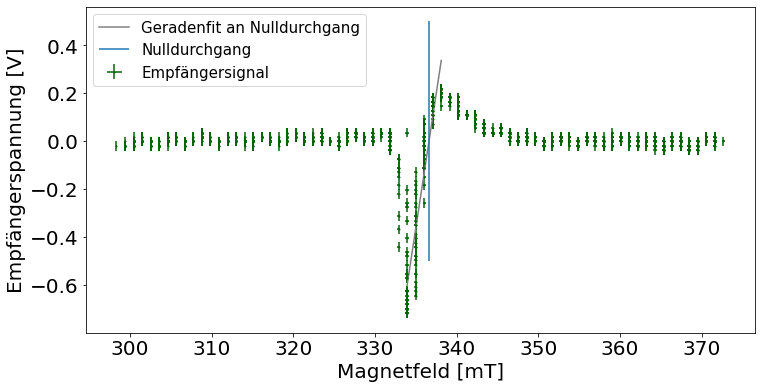

Nulldurchgang des Magnetfelds absteigend:  311.4478066981632
Fehler Magnetfeld:  1.0074027932184215


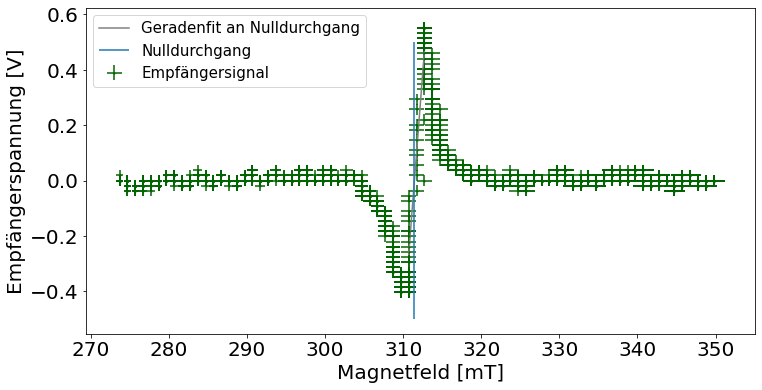

In [799]:

plotNulldurchgangAufsteigend(eingansw0m1,empfaengerw0m1)
plotNulldurchgangAbsteigend(eingansw0m1,empfaengerw0m1)

Nulldurchgang des Magnetfelds aufsteigend:  336.1046297502041
Fehler Magnetfeld:  1.137778948739162


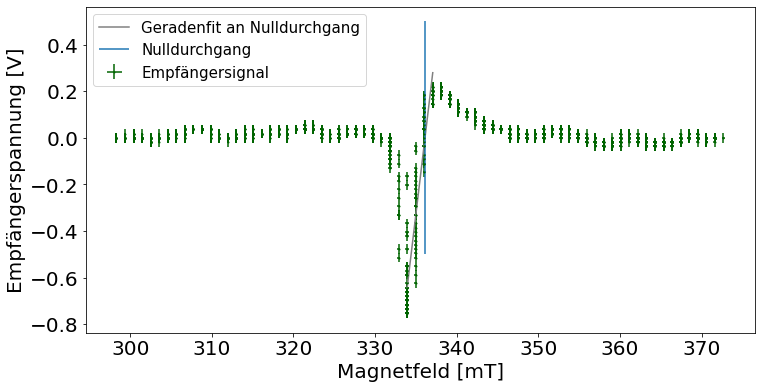

Nulldurchgang des Magnetfelds absteigend:  311.32525206346935
Fehler Magnetfeld:  1.0057466495063423


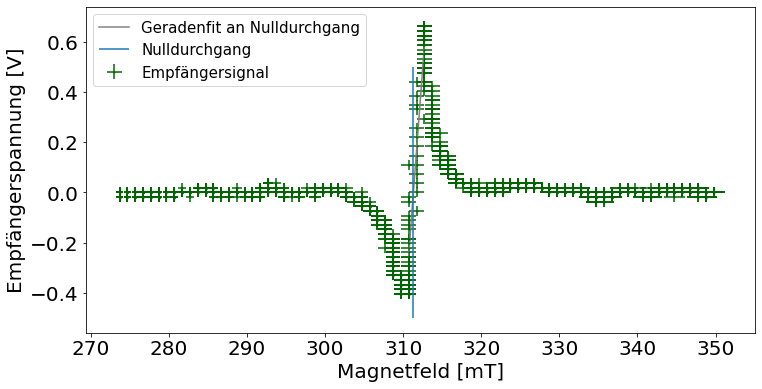

In [800]:
plotNulldurchgangAufsteigend(eingansw0m2,empfaengerw0m2)
plotNulldurchgangAbsteigend(eingansw0m2,empfaengerw0m2)

Nulldurchgang des Magnetfelds aufsteigend:  335.7845098522449
Fehler Magnetfeld:  1.1341396909518369


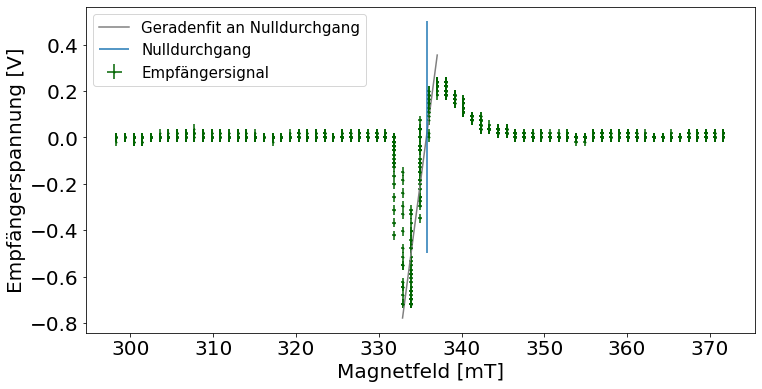

Nulldurchgang des Magnetfelds absteigend:  310.93815262448976
Fehler Magnetfeld:  1.000515576006618


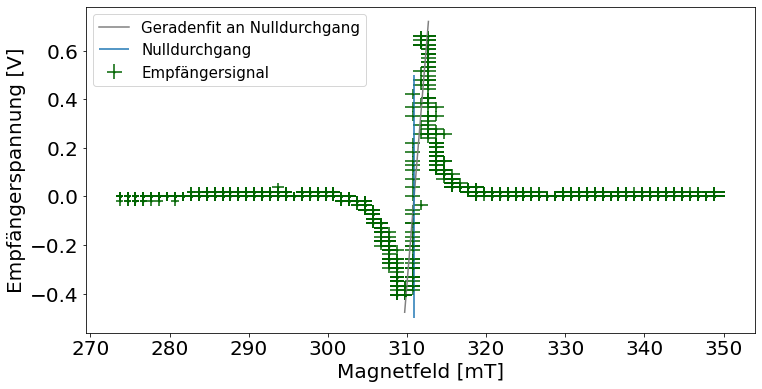

In [801]:
plotNulldurchgangAufsteigend(eingansw0m3,empfaengerw0m3)
plotNulldurchgangAbsteigend(eingansw0m3,empfaengerw0m3)

Nulldurchgang des Magnetfelds aufsteigend:  335.9121284122449
Fehler Magnetfeld:  1.135590512476047


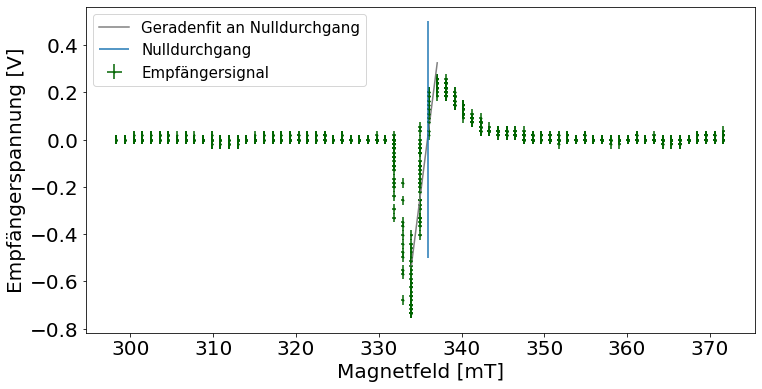

Nulldurchgang des Magnetfelds absteigend:  310.95758815938774
Fehler Magnetfeld:  1.0007782183701044


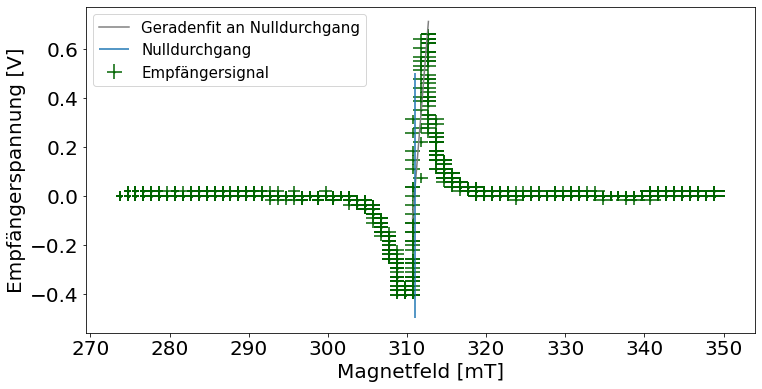

In [802]:
plotNulldurchgangAufsteigend(eingansw0m4,empfaengerw0m4)
plotNulldurchgangAbsteigend(eingansw0m4,empfaengerw0m4)

Nulldurchgang des Magnetfelds aufsteigend:  335.52798453469387
Fehler Magnetfeld:  1.1312234031312565


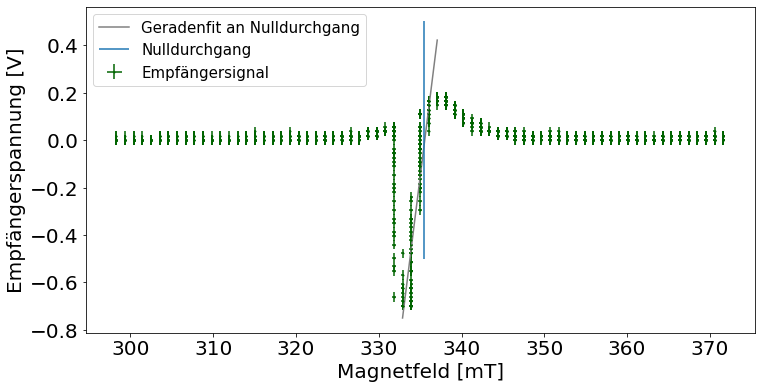

Nulldurchgang des Magnetfelds absteigend:  310.8769094532653
Fehler Magnetfeld:  0.9996879655846658


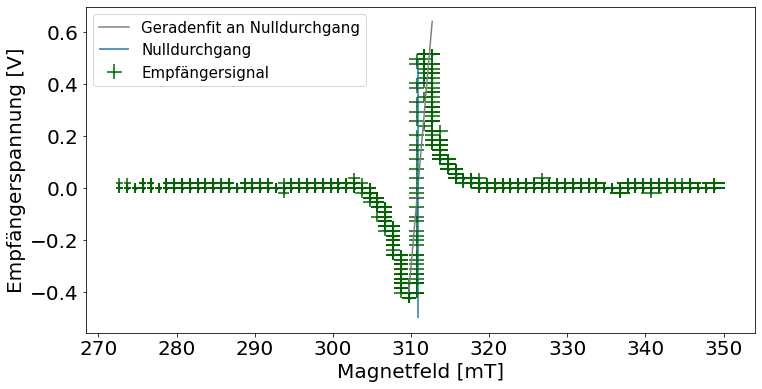

In [803]:
plotNulldurchgangAufsteigend(eingansw30m1,empfaengerw30m1)
plotNulldurchgangAbsteigend(eingansw30m1,empfaengerw30m1)

Nulldurchgang des Magnetfelds aufsteigend:  335.05647148816325
Fehler Magnetfeld:  1.1258630442864874


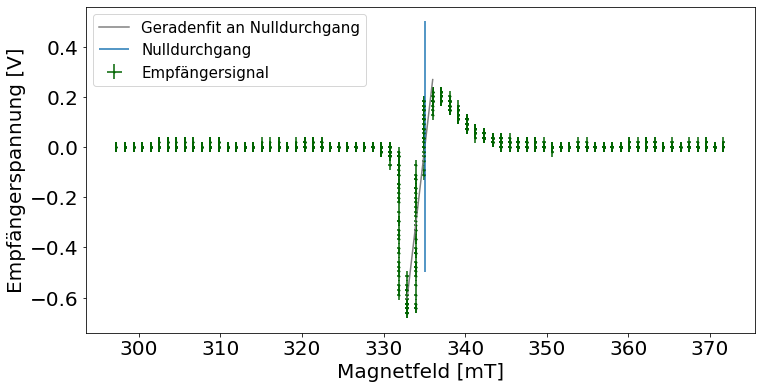

Nulldurchgang des Magnetfelds absteigend:  310.2035066661224
Fehler Magnetfeld:  0.9905879279205726


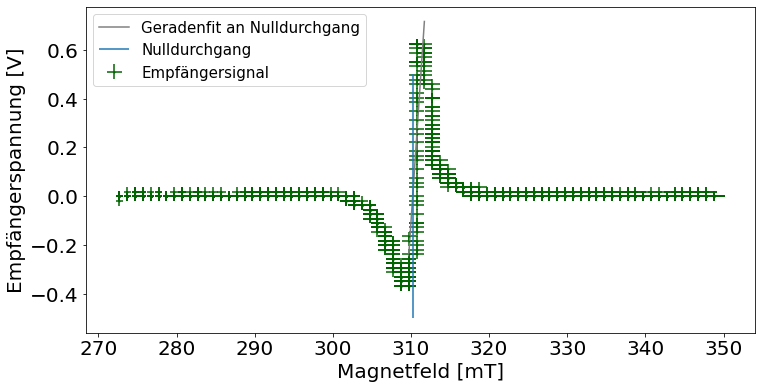

In [804]:
plotNulldurchgangAufsteigend(eingansw60m1,empfaengerw60m1)
plotNulldurchgangAbsteigend(eingansw60m1,empfaengerw60m1)

Nulldurchgang des Magnetfelds aufsteigend:  335.9758661257143
Fehler Magnetfeld:  1.136315109639699


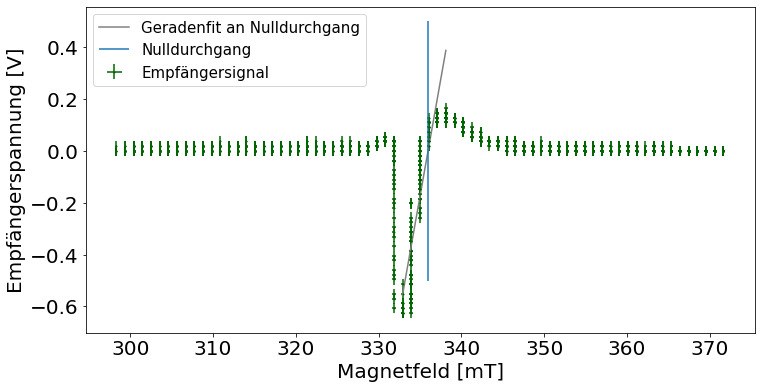

Nulldurchgang des Magnetfelds absteigend:  310.65287267673466
Fehler Magnetfeld:  0.9966604415774951


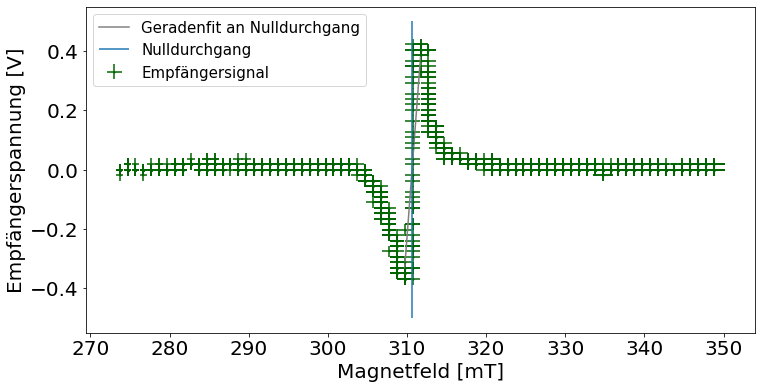

In [805]:
plotNulldurchgangAufsteigend(eingansw90m1,empfaengerw90m1)
plotNulldurchgangAbsteigend(eingansw90m1,empfaengerw90m1)

Nulldurchgang des Magnetfelds aufsteigend:  334.8000893036735
Fehler Magnetfeld:  1.122948383662814


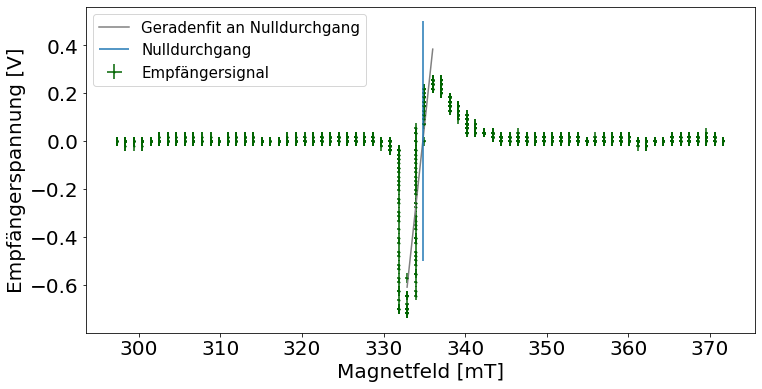

Nulldurchgang des Magnetfelds absteigend:  310.4677793740816
Fehler Magnetfeld:  0.9941591807308322


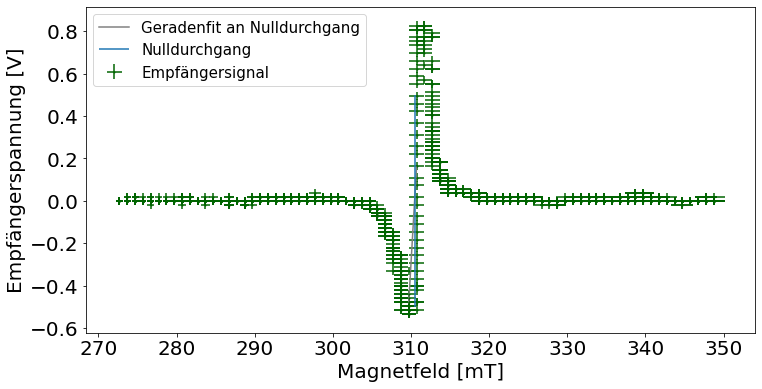

In [806]:
plotNulldurchgangAufsteigend(eingansw120m1,empfaengerw120m1)
plotNulldurchgangAbsteigend(eingansw120m1,empfaengerw120m1)

Nulldurchgang des Magnetfelds aufsteigend:  335.2487581265306
Fehler Magnetfeld:  1.1280490397542426


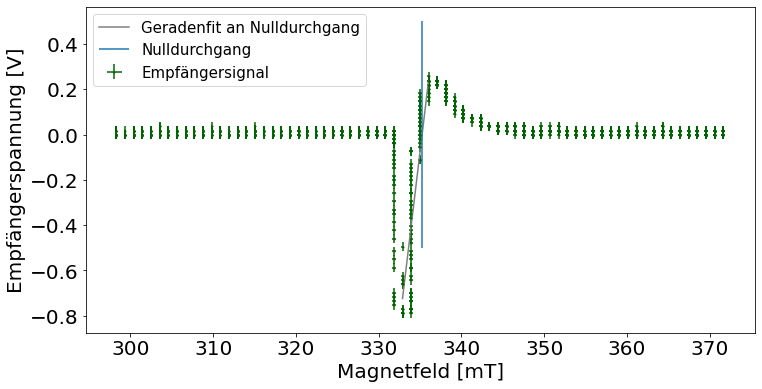

Nulldurchgang des Magnetfelds absteigend:  310.5711697657143
Fehler Magnetfeld:  0.9955563481853278


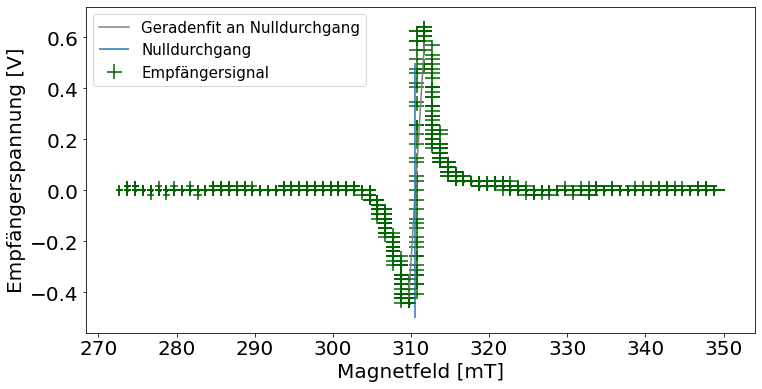

In [807]:
plotNulldurchgangAufsteigend(eingansw150m1,empfaengerw150m1)
plotNulldurchgangAbsteigend(eingansw150m1,empfaengerw150m1)

Nulldurchgang des Magnetfelds aufsteigend:  335.35696765632656
Fehler Magnetfeld:  1.1292792112508703


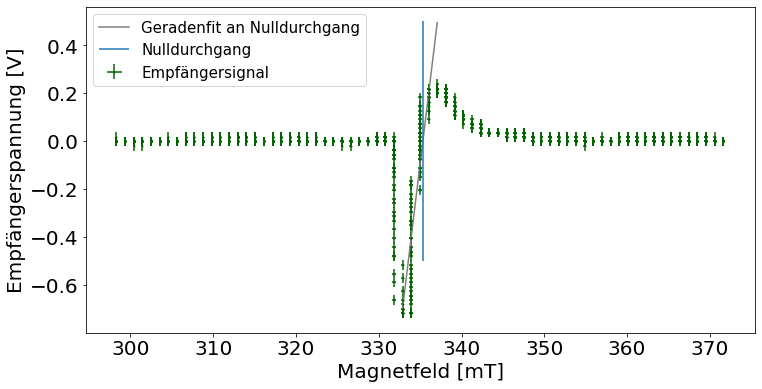

Nulldurchgang des Magnetfelds absteigend:  310.77542704326527
Fehler Magnetfeld:  0.9983165816657465


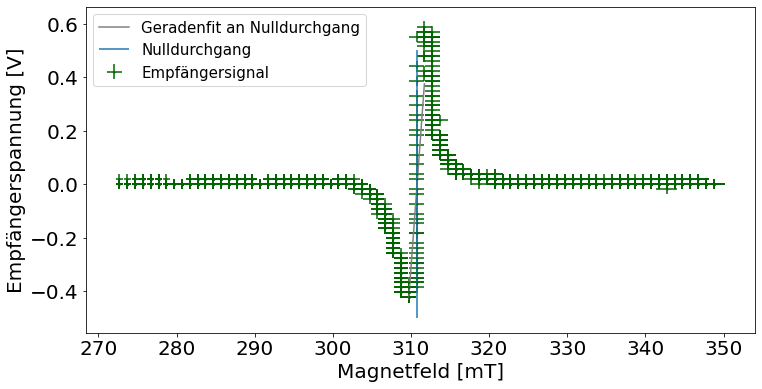

In [808]:
plotNulldurchgangAufsteigend(eingansw180m1,empfaengerw180m1)
plotNulldurchgangAbsteigend(eingansw180m1,empfaengerw180m1)

In [809]:
#Calculations of g_values aufsteigend und absteigend
magnetfeld_aufsteigend = 10**(-3)*np.array(magnetfeld_aufsteigend)
magnetfeld_absteigend = 10**(-3)*np.array(magnetfeld_absteigend)
magnetfeld_aufsteigend_fehler = 10**(-3)*np.array(magnetfeld_aufsteigend_fehler)
magnetfeld_absteigend_fehler = 10**(-3)*np.array(magnetfeld_absteigend_fehler)
g_values_aufsteigend = calculate_g(frequenzen, magnetfeld_aufsteigend)
g_values_absteigend = calculate_g(frequenzen, magnetfeld_absteigend)
frequenzen_errors = np.full([1,1],1*10**6)
delta_g_values_aufsteigend = calculate_delta_g(frequenzen, frequenzen_errors, magnetfeld_aufsteigend, magnetfeld_aufsteigend_fehler)
delta_g_values_absteigend = calculate_delta_g(frequenzen, frequenzen_errors, magnetfeld_absteigend, magnetfeld_absteigend_fehler)
print("g-Faktoren B aufsteigend:")
print(g_values_aufsteigend)
print("Fehler: ")
print(delta_g_values_aufsteigend)
print("g-Faktoren B absteigend:")
print(g_values_absteigend)
print("Fehler")
print(delta_g_values_absteigend)

g-Faktoren B aufsteigend:
[1.87292482 1.87553874 1.87732678 1.87661356 1.87897502 1.88119276
 1.8764702  1.88263333 1.88032689 1.87950712]
Fehler: 
[[0.0031876  0.00318164 0.00317754 0.00317918 0.00317461 0.00316779
  0.00318035 0.00316446 0.00317064 0.00317168]]
g-Faktoren B absteigend:
[2.02402213 2.0248189  2.02733968 2.02721296 2.02796889 2.03191064
 2.02943142 2.03018107 2.02973526 2.02817132]
Fehler
[[0.00328146 0.00327866 0.0032698  0.00327025 0.00326876 0.00325246
  0.0032636  0.00325859 0.00326135 0.00326569]]
